In [266]:
from datetime import timedelta, date
import datetime
import numpy as np
import pandas as pd
import string
import re
import csv
import requests
import string

df_remotes = pd.read_csv('turnstile_location.csv', delimiter = ',', header = 0, skipinitialspace = True)

df_remotes.drop('1', axis = 1, inplace = True)

In [267]:
df_remotes.head()

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [268]:
df_stations = pd.read_csv('stations.csv', delimiter = ',', header = 0, skipinitialspace = True)

In [269]:
df_stations.head(5)

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575


In [270]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC
768773,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,00:00:00,REGULAR,5620446,1903294,2016-04-16 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN
768774,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,04:00:00,REGULAR,5620502,1903306,2016-04-16 04:00:00,2016-04-16 00:00:00,5620446.0,1903294.0,56.0,12.0,68.0
768775,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0
768776,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0
768777,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0


In [271]:
df_traffic["REMOTE_ID"] = df_traffic["C/A"] + df_traffic["UNIT"]

In [272]:
df_remotes["REMOTE_ID"] = df_remotes["Booth"] + df_remotes["Remote"]

In [273]:
df_remotes.rename(columns={'Station': 'STATION_NAME'}, inplace=True)

In [274]:
df_remotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
Remote          768 non-null object
Booth           768 non-null object
STATION_NAME    768 non-null object
Line Name       768 non-null object
Division        768 non-null object
REMOTE_ID       768 non-null object
dtypes: object(6)
memory usage: 36.1+ KB


In [275]:
df_remotes[["STATION_NAME","REMOTE_ID"]].set_index("REMOTE_ID")

,STATION_NAME
REMOTE_ID,
A060R001,WHITEHALL ST
A058R001,WHITEHALL ST
R101SR001,SOUTH FERRY
A077R002,FULTON ST
A081R002,FULTON ST
A082R002,FULTON ST
J025R003,CYPRESS HILLS
J028R004,ELDERTS LANE
J030R005,FOREST PARKWAY


In [276]:
df_traffic=df_traffic.set_index('REMOTE_ID').join(df_remotes[["STATION_NAME","REMOTE_ID"]].set_index('REMOTE_ID'))
df_traffic

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,00:00:00,REGULAR,5620446,1903294,2016-04-16 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,04:00:00,REGULAR,5620502,1903306,2016-04-16 04:00:00,2016-04-16 00:00:00,5620446.0,1903294.0,56.0,12.0,68.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,12:00:00,REGULAR,5620652,1903431,2016-04-16 12:00:00,2016-04-16 08:01:14,5620519.0,1903339.0,133.0,92.0,225.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,16:00:00,REGULAR,5620935,1903495,2016-04-16 16:00:00,2016-04-16 12:00:00,5620652.0,1903431.0,283.0,64.0,347.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,20:00:00,REGULAR,5621309,1903549,2016-04-16 20:00:00,2016-04-16 16:00:00,5620935.0,1903495.0,374.0,54.0,428.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/17/2016,00:00:00,REGULAR,5621453,1903573,2016-04-17 00:00:00,2016-04-16 20:00:00,5621309.0,1903549.0,144.0,24.0,168.0,LEXINGTON AVE


In [277]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738640 entries, A002R051 to TRAM2R469
Data columns (total 19 columns):
C/A             object
UNIT            object
SCP             object
STATION         object
LINENAME        object
DIVISION        object
DATE            object
TIME            object
DESC            object
ENTRIES         int64
EXITS           int64
DATE_TIME       datetime64[ns]
PREV_DATE       datetime64[ns]
PREV_ENTRIES    float64
PREV_EXITS      float64
DIFF_ENTRIES    float64
DIFF_EXITS      float64
TOT_TRAFFIC     float64
STATION_NAME    object
dtypes: datetime64[ns](2), float64(5), int64(2), object(10)
memory usage: 265.3+ MB


In [278]:
#df_traffic = pd.read_csv('traffic.csv', delimiter = ',', header = 0, skipinitialspace = True)

In [279]:
df_traffic.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,00:00:00,REGULAR,5620446,1903294,2016-04-16 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,04:00:00,REGULAR,5620502,1903306,2016-04-16 04:00:00,2016-04-16 00:00:00,5620446.0,1903294.0,56.0,12.0,68.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0,LEXINGTON AVE


In [282]:
df_traffic.isnull().sum()

C/A                 0
UNIT                0
SCP                 0
STATION             0
LINENAME            0
DIVISION            0
DATE                0
TIME                0
DESC                0
ENTRIES             0
EXITS               0
DATE_TIME           0
PREV_DATE        6623
PREV_ENTRIES     6623
PREV_EXITS       6623
DIFF_ENTRIES     6623
DIFF_EXITS       6623
TOT_TRAFFIC      6623
STATION_NAME    45569
dtype: int64

In [281]:
df_traffic.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC
count,1.738640e+06,1.738640e+06,1.732017e+06,1.732017e+06,1.732017e+06,1.732017e+06,1.732017e+06
mean,3.230188e+07,2.592695e+07,3.229059e+07,2.591734e+07,2.876981e+04,2.237184e+04,5.114165e+04
std,1.869530e+08,1.668627e+08,1.869204e+08,1.668335e+08,5.825021e+06,4.827397e+06,1.009613e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.263878e+05,2.766300e+05,5.261950e+05,2.763690e+05,1.200000e+01,9.000000e+00,3.400000e+01
50%,2.428466e+06,1.444679e+06,2.427727e+06,1.444475e+06,8.400000e+01,5.600000e+01,1.910000e+02
75%,6.216643e+06,4.448201e+06,6.215367e+06,4.447515e+06,2.670000e+02,1.790000e+02,4.990000e+02
max,2.146661e+09,2.087387e+09,2.146661e+09,2.087387e+09,1.961790e+09,2.022960e+09,3.929731e+09


In [283]:
df_traffic.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'PREV_DATE', 'PREV_ENTRIES',
       'PREV_EXITS', 'DIFF_ENTRIES', 'DIFF_EXITS', 'TOT_TRAFFIC',
       'STATION_NAME'],
      dtype='object')

In [284]:
df_traffic_time = df_traffic.TIME.value_counts().sort_values(ascending = False)

print(df_traffic_time.head(50))

04:00:00    149794
00:00:00    149778
08:00:00    149713
20:00:00    149623
12:00:00    149623
16:00:00    149623
01:00:00    105844
05:00:00    105828
09:00:00    105804
21:00:00    105776
17:00:00    105733
13:00:00    105705
10:00:00      6933
02:00:00      6924
14:00:00      6924
06:00:00      6919
18:00:00      6917
22:00:00      6915
23:00:00      2461
11:00:00      2459
03:00:00      2458
19:00:00      2457
07:00:00      2456
15:00:00      2456
00:22:00      2333
04:22:00      2331
08:22:00      2331
20:22:00      2331
16:22:00      2330
12:22:00      2329
22:30:00      1261
02:30:00      1260
06:30:00      1260
18:30:00      1260
10:30:00      1259
14:30:00      1257
00:30:00       629
08:30:00       629
04:30:00       629
20:30:00       629
12:30:00       627
16:30:00       625
05:00:01        56
08:46:31        33
07:41:25        32
10:07:04        30
07:51:16        30
10:11:32        29
08:46:13        28
10:27:47        28
Name: TIME, dtype: int64


In [285]:
df_traffic_time.describe()

count     51424.000000
mean         33.809894
std        1981.456319
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max      149794.000000
Name: TIME, dtype: float64

In [286]:
df_traffic["DATE_TIME"] = pd.to_datetime(df_traffic.DATE + " " + df_traffic.TIME, format="%m/%d/%Y %H:%M:%S")

In [287]:
df_traffic = df_traffic.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE_TIME'], ascending=True)

In [288]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,00:00:00,REGULAR,5620446,1903294,2016-04-16 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,04:00:00,REGULAR,5620502,1903306,2016-04-16 04:00:00,2016-04-16 00:00:00,5620446.0,1903294.0,56.0,12.0,68.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0,LEXINGTON AVE


In [289]:
df_traffic[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df_traffic
                                                       .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION'])['DATE_TIME', 'ENTRIES', 'EXITS']
                                                       .transform(lambda grp: grp.shift(1)))

In [290]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,00:00:00,REGULAR,5620446,1903294,2016-04-16 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,04:00:00,REGULAR,5620502,1903306,2016-04-16 04:00:00,2016-04-16 00:00:00,5620446.0,1903294.0,56.0,12.0,68.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0,LEXINGTON AVE


In [291]:
df_traffic["DIFF_ENTRIES"] = abs(df_traffic["ENTRIES"] - df_traffic["PREV_ENTRIES"])

In [292]:
df_traffic["DIFF_EXITS"] = abs(df_traffic["EXITS"] - df_traffic["PREV_EXITS"])

In [293]:
df_traffic["TOT_TRAFFIC"] = (df_traffic["DIFF_ENTRIES"] + df_traffic["DIFF_EXITS"])

In [294]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,00:00:00,REGULAR,5620446,1903294,2016-04-16 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,04:00:00,REGULAR,5620502,1903306,2016-04-16 04:00:00,2016-04-16 00:00:00,5620446.0,1903294.0,56.0,12.0,68.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0,LEXINGTON AVE


In [297]:
df_traffic.sort_values(['DIFF_ENTRIES'],ascending = False).head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,
N067R012,N067,R012,00-03-00,34 ST-PENN STA,ACE,IND,05/03/2016,16:00:00,RECOVR AUD,2425094,164,2016-05-03 16:00:00,2016-05-03 12:00:00,1.964215e+09,486935942.0,1.961790e+09,4.869358e+08,2.448726e+09,34 ST-PENN STA
N016AR296,N016A,R296,00-00-01,163 ST-AMSTERDM,C,IND,04/16/2016,01:00:00,REGULAR,1952546825,664258783,2016-04-16 01:00:00,2015-05-10 13:00:00,2.003000e+04,1695.0,1.952527e+09,6.642571e+08,2.616784e+09,163 ST-AMSTERDM
R310R053,R310,R053,01-00-02,149 ST-3 AVE,25,IRT,05/06/2015,08:00:00,REGULAR,1946156083,1241538350,2015-05-06 08:00:00,2015-05-06 04:00:00,4.795961e+06,569023.0,1.941360e+09,1.240969e+09,3.182329e+09,149 ST-3 AVE
R305R206,R305,R206,01-00-02,125 ST,23,IRT,04/16/2016,01:00:00,REGULAR,1946124769,1493224142,2016-04-16 01:00:00,2015-05-15 21:00:00,8.601293e+06,5578062.0,1.937523e+09,1.487646e+09,3.425170e+09,125 ST
N501R020,N501,R020,01-03-02,47-50 STS ROCK,BDFM,IND,05/04/2016,16:00:00,REGULAR,1921834861,2035494500,2016-05-04 16:00:00,2016-05-04 12:00:00,1.506382e+07,12534890.0,1.906771e+09,2.022960e+09,3.929731e+09,47-50 ST-ROCK


In [298]:
df_traffic[(df_traffic.LINENAME == 'F') & (df_traffic.UNIT == 'R302') & (df_traffic.SCP == '00-06-00') & (df_traffic.DATE == '04/12/2017')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,


In [299]:
df_traffic.DESC.value_counts()

REGULAR       1730493
RECOVR AUD       8147
Name: DESC, dtype: int64

In [300]:
df_traffic.DATE.describe()

count        1738640
unique            63
top       04/18/2016
freq           28710
Name: DATE, dtype: object

In [301]:
from copy import deepcopy, copy

df_traffic_nan = df_traffic.copy(deep=True)

In [302]:
df_traffic_nan.dropna(axis=0, how='any', inplace = True)

In [303]:
df_traffic_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1686591 entries, A002R051 to TRAM2R469
Data columns (total 19 columns):
C/A             1686591 non-null object
UNIT            1686591 non-null object
SCP             1686591 non-null object
STATION         1686591 non-null object
LINENAME        1686591 non-null object
DIVISION        1686591 non-null object
DATE            1686591 non-null object
TIME            1686591 non-null object
DESC            1686591 non-null object
ENTRIES         1686591 non-null int64
EXITS           1686591 non-null int64
DATE_TIME       1686591 non-null datetime64[ns]
PREV_DATE       1686591 non-null datetime64[ns]
PREV_ENTRIES    1686591 non-null float64
PREV_EXITS      1686591 non-null float64
DIFF_ENTRIES    1686591 non-null float64
DIFF_EXITS      1686591 non-null float64
TOT_TRAFFIC     1686591 non-null float64
STATION_NAME    1686591 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(10)
memory usage: 257.4+ MB


In [304]:
df_traffic_nan[df_traffic_nan.PREV_ENTRIES.isnull()]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,


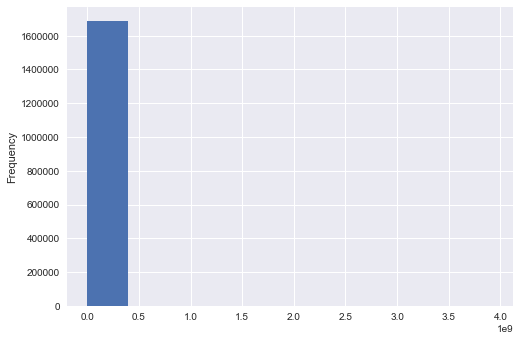

In [305]:
df_traffic_nan.TOT_TRAFFIC.plot.hist()

In [306]:
#df_traffic_201705.groupby('TOT_TRAFFIC')['DATE'].transform(lambda x: max(x))
df_traffic_time = df_traffic_nan[df_traffic_nan.DATE == df_traffic_nan.groupby('TOT_TRAFFIC').DATE.transform(max)]
df_sort_time=df_traffic_time[['DATE','TOT_TRAFFIC']].sort_values(by=['TOT_TRAFFIC'], ascending =False)
station_data = df_sort_time.groupby(['DATE']).TOT_TRAFFIC.agg(['max'])
station_data


,max
DATE,
04/16/2016,3.425170e+09
04/17/2016,1.056260e+05
04/18/2015,4.758520e+05
04/18/2016,1.872160e+05
04/19/2016,9.352260e+05
04/20/2015,1.678285e+08
04/20/2016,9.833680e+05
04/21/2015,1.651192e+06
04/21/2016,9.830070e+05


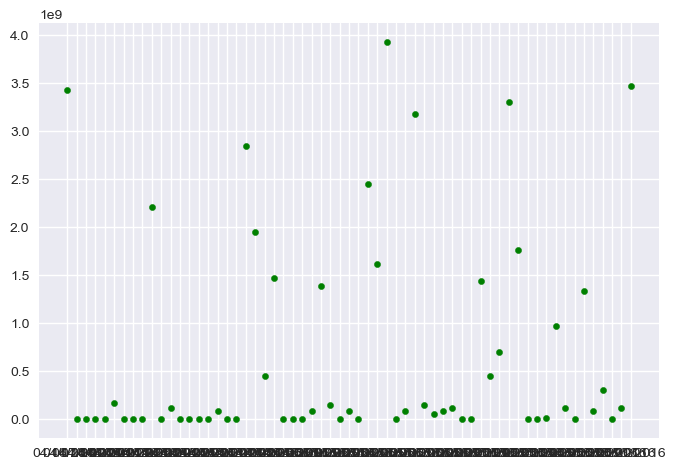

In [307]:
'''x = station_data.index
y = station_data['max']
plt.figure(dpi=100)
plt.scatter(x,y, s= 20, marker = 'o', c='green') # Small size circles'''
#This will be used for future study, fixing this up when we have more of a clue what's going on, if we ever do..

In [340]:
df_traffic_nan2 = df_traffic_nan.groupby(['STATION_NAME','DATE']).TOT_TRAFFIC.agg(['max'])
df_traffic_nan2.sort_values('max',ascending = False)

,,max
STATION_NAME,DATE,
47-50 ST-ROCK,05/04/2016,3.929731e+09
CANAL ST,05/20/2016,3.472695e+09
125 ST,04/16/2016,3.425170e+09
28 ST,05/11/2016,3.300959e+09
149 ST-3 AVE,05/06/2015,3.182329e+09
116 ST,04/16/2016,2.887042e+09
FULTON ST,04/27/2015,2.841007e+09
34 ST-PENN STA,04/16/2016,2.694594e+09
167 ST,04/16/2016,2.624483e+09


In [428]:
'''x = df_traffic_nan.index
y = df_traffic_nan['max']
plt.figure(dpi=100)
plt.scatter(x,y, s= 20, marker = 'o', c='green') # Small size circles'''
#future study

"x = df_traffic_nan.index\ny = df_traffic_nan['max']\nplt.figure(dpi=100)\nplt.scatter(x,y, s= 20, marker = 'o', c='green') # Small size circles"

In [345]:
df_active_hrs = df_traffic_nan[(df_traffic_nan.TIME <= '23:59:59') & (df_traffic_nan.TIME >= '06:00:00')]
#excluding the data from 12am to 6am

In [346]:
df_active_hrs.head(5)
#check

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
REMOTE_ID,,,,,,,,,,,,,,,,,,,
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,12:00:00,REGULAR,5620652,1903431,2016-04-16 12:00:00,2016-04-16 08:01:14,5620519.0,1903339.0,133.0,92.0,225.0,LEXINGTON AVE
A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,16:00:00,REGULAR,5620935,1903495,2016-04-16 16:00:00,2016-04-16 12:00:00,5620652.0,1903431.0,283.0,64.0,347.0,LEXINGTON AVE


In [347]:
df_dead = df_traffic_nan[(df_traffic_nan.TIME > '23:59:59') | (df_traffic_nan.TIME < '06:30:00')]
#check to see what the time frame we are excluding looks like
#will be useful for future study

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline

plt.style.use('seaborn')

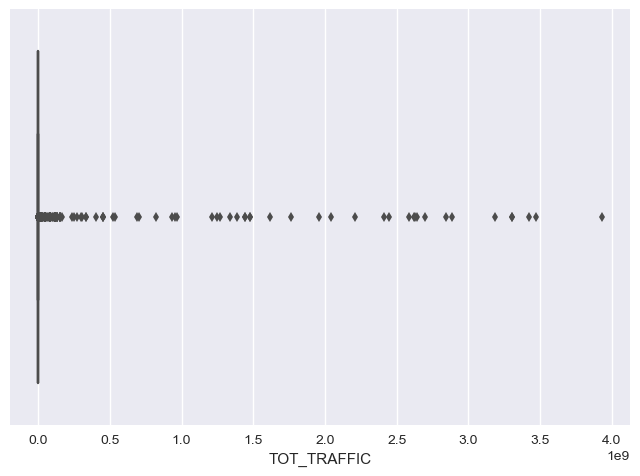

In [391]:
plt.figure(dpi=100)
sns.boxplot(df_traffic_nan.TOT_TRAFFIC)
#boxplot after removing NaNs

In [392]:
df_traffic_nan.TOT_TRAFFIC.describe()
#check

count    1.686591e+06
mean     5.248713e+04
std      1.023118e+07
min      0.000000e+00
25%      3.600000e+01
50%      1.960000e+02
75%      5.040000e+02
max      3.929731e+09
Name: TOT_TRAFFIC, dtype: float64

(0, 2000)

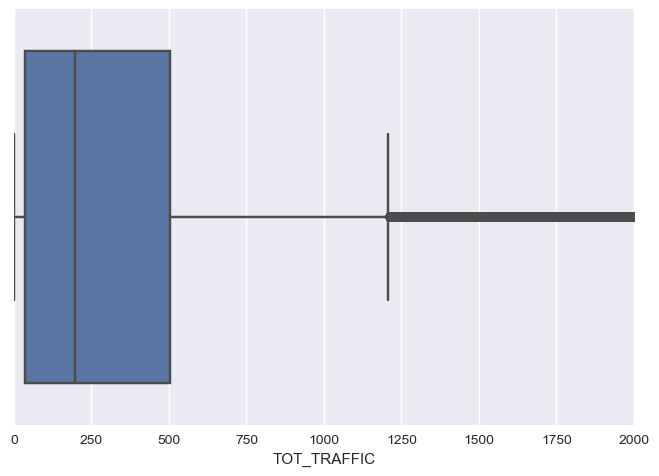

In [393]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_traffic_nan.TOT_TRAFFIC)
histplot.set_xlim(0,2000)
#zooming in on box plot to see where outliers begin

In [400]:
df_active_hrs.TOT_TRAFFIC.describe()
#check to see if our outlier cutoff point is correct
#using best practices in stats, 75%-25% = 641-94 = 547; 547*1.5 = 820.5; 820.5 + 641 = 1461.50; 
#we chose 1450 and this seems close enough to us to not worry about our choice

count    1.153112e+06
mean     3.864354e+04
std      9.191074e+06
min      0.000000e+00
25%      9.400000e+01
50%      3.140000e+02
75%      6.410000e+02
max      3.929731e+09
Name: TOT_TRAFFIC, dtype: float64

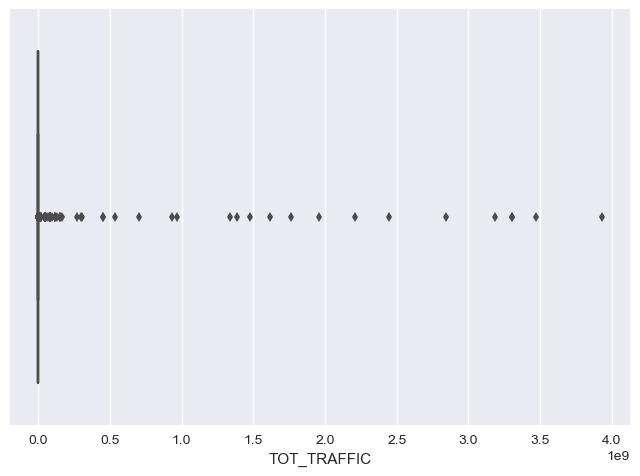

In [408]:
plt.figure(dpi=100)
sns.boxplot(df_active_hrs.TOT_TRAFFIC)

(0, 1800)

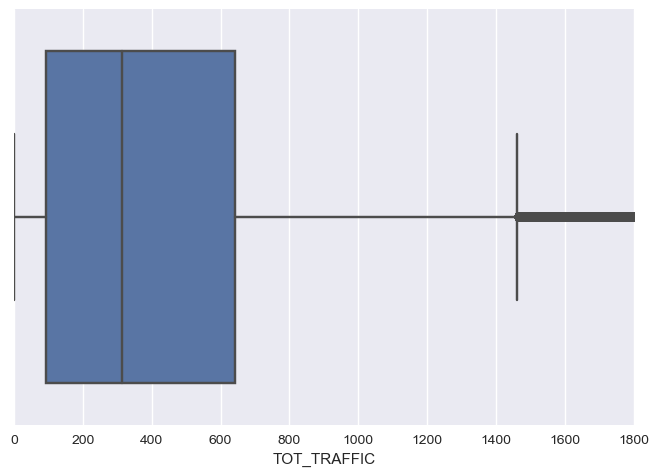

In [409]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_active_hrs.TOT_TRAFFIC)
histplot.set_xlim(0,1800)

In [410]:
outlier_limit = 1450

In [411]:
df_excl_outliers = df_active_hrs[(df_active_hrs.TOT_TRAFFIC < outlier_limit)]

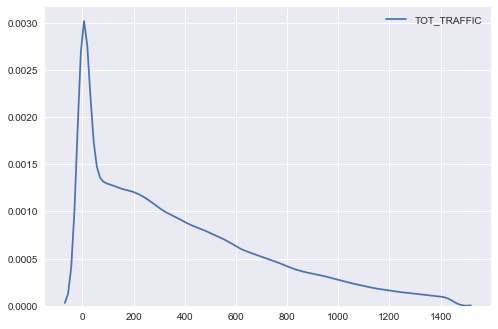

In [412]:
sns.kdeplot(df_excl_outliers.TOT_TRAFFIC)

(0, 1500)

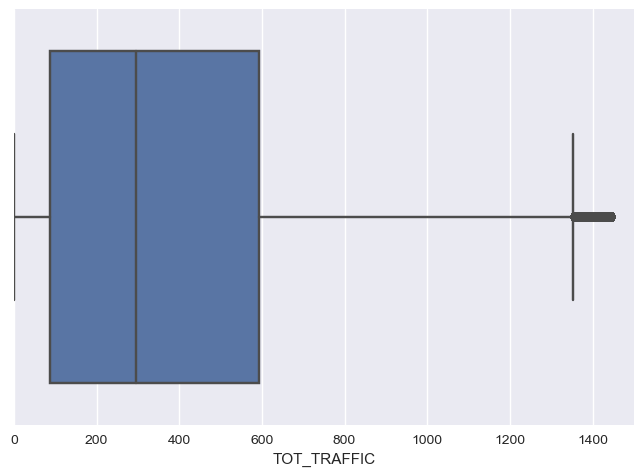

In [419]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_excl_outliers.TOT_TRAFFIC)
histplot.set_xlim(0,1500)

In [414]:
1-(df_active_hrs.UNIT.count() - df_excl_outliers.UNIT.count())/df_active_hrs.UNIT.count()

0.9624858643392836

In [420]:
df_excl_outliers.TOT_TRAFFIC.describe()

count    1.109854e+06
mean     3.824873e+02
std      3.497731e+02
min      0.000000e+00
25%      8.700000e+01
50%      2.950000e+02
75%      5.930000e+02
max      1.449000e+03
Name: TOT_TRAFFIC, dtype: float64

In [415]:
print(df_traffic.TOT_TRAFFIC.median(),df_active_hrs.TOT_TRAFFIC.median(),df_excl_outliers.TOT_TRAFFIC.median())


191.0 314.0 295.0


In [416]:
print(df_traffic_nan.TOT_TRAFFIC.mean(),df_active_hrs.TOT_TRAFFIC.mean(),df_excl_outliers.TOT_TRAFFIC.mean())


52487.132724531315 38643.54428104122 382.4873091415628


In [417]:
df_excl_outliers.shape

(1109854, 19)

In [418]:
df_excl_outliers['STATION'].head()


REMOTE_ID
A002R051    59 ST
A002R051    59 ST
A002R051    59 ST
A002R051    59 ST
A002R051    59 ST
Name: STATION, dtype: object

In [372]:
df_excl_outliers.reset_index()

,REMOTE_ID,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC,STATION_NAME
0,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,07:52:20,REGULAR,5620518,1903334,2016-04-16 07:52:20,2016-04-16 04:00:00,5620502.0,1903306.0,16.0,28.0,44.0,LEXINGTON AVE
1,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:00:00,REGULAR,5620519,1903339,2016-04-16 08:00:00,2016-04-16 07:52:20,5620518.0,1903334.0,1.0,5.0,6.0,LEXINGTON AVE
2,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,08:01:14,REGULAR,5620519,1903339,2016-04-16 08:01:14,2016-04-16 08:00:00,5620519.0,1903339.0,0.0,0.0,0.0,LEXINGTON AVE
3,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,12:00:00,REGULAR,5620652,1903431,2016-04-16 12:00:00,2016-04-16 08:01:14,5620519.0,1903339.0,133.0,92.0,225.0,LEXINGTON AVE
4,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,16:00:00,REGULAR,5620935,1903495,2016-04-16 16:00:00,2016-04-16 12:00:00,5620652.0,1903431.0,283.0,64.0,347.0,LEXINGTON AVE
5,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/16/2016,20:00:00,REGULAR,5621309,1903549,2016-04-16 20:00:00,2016-04-16 16:00:00,5620935.0,1903495.0,374.0,54.0,428.0,LEXINGTON AVE
6,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/17/2016,08:00:00,REGULAR,5621496,1903592,2016-04-17 08:00:00,2016-04-17 04:00:00,5621482.0,1903578.0,14.0,14.0,28.0,LEXINGTON AVE
7,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/17/2016,12:00:00,REGULAR,5621585,1903661,2016-04-17 12:00:00,2016-04-17 08:00:00,5621496.0,1903592.0,89.0,69.0,158.0,LEXINGTON AVE
8,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/17/2016,16:00:00,REGULAR,5621789,1903703,2016-04-17 16:00:00,2016-04-17 12:00:00,5621585.0,1903661.0,204.0,42.0,246.0,LEXINGTON AVE
9,A002R051,A002,R051,02-00-00,59 ST,NQR456,BMT,04/17/2016,20:00:00,REGULAR,5622076,1903749,2016-04-17 20:00:00,2016-04-17 16:00:00,5621789.0,1903703.0,287.0,46.0,333.0,LEXINGTON AVE


In [362]:
#df_traffic.groupby(['STATION'])['TOT_TRAFFIC'].sum().nlargest(10)
#df_excl_outliers.groupby(['STATION'])['TOT_TRAFFIC'].sum().nlargest(10)

In [430]:
df_topten_stations = df_excl_outliers.groupby(['STATION']).TOT_TRAFFIC.agg(['sum']).sort_values(by=['sum'], ascending=False).head(18)
df_topten_stations

,sum
STATION,
34 ST-PENN STA,12033103.0
86 ST,6643242.0
23 ST,6474320.0
34 ST-HERALD SQ,6316468.0
125 ST,5924699.0
CANAL ST,5921749.0
59 ST,5629349.0
CHAMBERS ST,5205049.0
FULTON ST,4892931.0


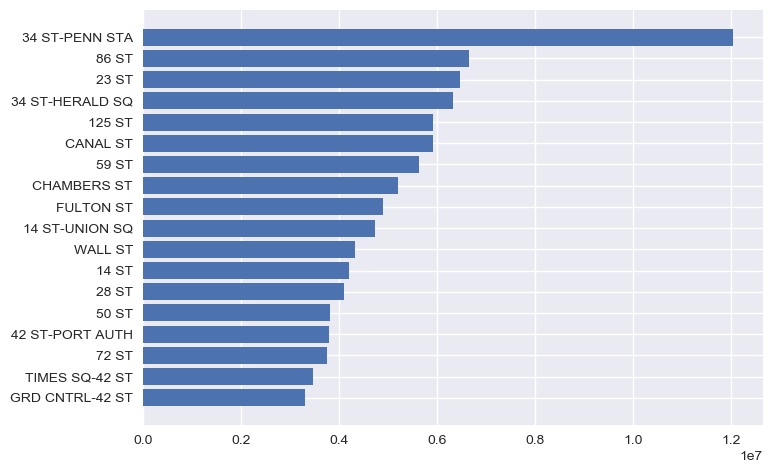

In [431]:
categories = df_topten_stations.index
values = df_topten_stations['sum']

plt.figure(dpi=100)

plt.barh(np.arange(len(categories)), values[::-1])

plt.yticks(np.arange(len(categories)),
           ['{}'.format(x) for x in categories[::-1]]);


In [365]:
'''categories = df_topten_stations['STATION']
values = df_topten_stations['TOT_TRAFFIC']

plt.figure()

plt.barh(np.arange(len(categories)), values)

plt.yticks(np.arange(len(categories)),
           ['Category {}'.format(x) for x in categories])
'''

"categories = df_topten_stations['STATION']\nvalues = df_topten_stations['TOT_TRAFFIC']\n\nplt.figure()\n\nplt.barh(np.arange(len(categories)), values)\n\nplt.yticks(np.arange(len(categories)),\n           ['Category {}'.format(x) for x in categories])\n"